# 필요 패키지
1. requests
2. lxml
3. BeautifulSoup

## 패키지 다운

In [31]:
import requests
from bs4 import BeautifulSoup

## URL정보 가져오기

In [39]:
html = requests.get("https://www.naver.com/") # url정보 가져오기
html.raise_for_status() #url의 접근 여부 확인후 에러 발생시 break
htmllang = BeautifulSoup(html.text,"lxml")

## 태그 확인 및 특정 속성값 가져오기

In [34]:
print(htmllang.title) #title 태그 가져오기
print(htmllang.title.get_text()) #title 태그의 값 가져오기
print(htmllang.a.attrs) #a태그의 속성 가져오기
print(htmllang.a["href"]) #a태그의 href의 속성 값 가져오기

<title>NAVER</title>
NAVER
{'href': '#newsstand'}
#newsstand


In [35]:
print(htmllang.find("li",attrs={"class":"category_item"})) #li 태그내 class 속성이 category_item인 첫번째 태그 가져오기
print(htmllang.find(attrs={"class":"category_item"}),end="\n\n") #class 속성이 category_item인 첫번째 태그 가져오기

li = htmllang.find("li",attrs={"class":"category_item"})
print(li.find("a"),end="\n\n") #앞서 받은 li 태그내 a 태그의 정보 가져오기

print(htmllang.find_all("li",attrs={"class":"category_item"})) # li 태그내 class 속성이 category_item인 모든 태그 가져오기

<li class="category_item" role="presentation">
<a aria-selected="false" class="_NM_THEME_CATE tab id_enter" data-clk="tct.tvc" data-panel-code="ENTER" href="#" role="tab">엔터</a>
</li>
<li class="category_item" role="presentation">
<a aria-selected="false" class="_NM_THEME_CATE tab id_enter" data-clk="tct.tvc" data-panel-code="ENTER" href="#" role="tab">엔터</a>
</li>

<a aria-selected="false" class="_NM_THEME_CATE tab id_enter" data-clk="tct.tvc" data-panel-code="ENTER" href="#" role="tab">엔터</a>

[<li class="category_item" role="presentation">
<a aria-selected="false" class="_NM_THEME_CATE tab id_enter" data-clk="tct.tvc" data-panel-code="ENTER" href="#" role="tab">엔터</a>
</li>, <li class="category_item" role="presentation">
<a aria-selected="false" class="_NM_THEME_CATE tab id_sports" data-clk="tct.spo" data-panel-code="SPORTS" href="#" role="tab">스포츠</a>
</li>, <li class="category_item" role="presentation">
<a aria-selected="false" class="_NM_THEME_CATE tab id_cargame" data-clk="tct.a

## 형제 태그 가져오기

In [65]:
next_sibling = htmllang.find("div",attrs={"id":"header"})
print(next_sibling.find_next_sibling()) #div태그의 id가 header의 아래의 태그 한개 가져오기

<div id="container" role="main"> <div style="position:relative;width:1130px;margin:0 auto;z-index:11"> <div id="da_top"></div> <div id="da_expwide"></div> </div> <div class="column_left" id="NM_INT_LEFT"> <div id="veta_top"> <iframe data-iframe-src="https://siape.veta.naver.com/fxshow?su=SU10599&amp;nrefreshx=0" data-veta-preview="main_time" frameborder="0" height="135" id="da_iframe_time" marginheight="0" marginwidth="0" name="da_iframe_time" scrolling="no" title="광고" width="750"> </iframe> <span class="veta_bd_t"></span> <span class="veta_bd_b"></span> <span class="veta_bd_l"></span> <span class="veta_bd_r"></span> </div> <div class="sc_newscast" id="newsstand"> <h2 class="blind">뉴스스탠드</h2> <div class="group_issue" data-clk-prefix="ncy" id="NM_NEWSSTAND_HEADER"> <div class="issue_area"> <a class="link_media" data-clk="newsflash" href="http://news.naver.com/main/list.naver?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y">연합뉴스</a> <div class="list_issue

[<div id="container" role="main"> <div style="position:relative;width:1130px;margin:0 auto;z-index:11"> <div id="da_top"></div> <div id="da_expwide"></div> </div> <div class="column_left" id="NM_INT_LEFT"> <div id="veta_top"> <iframe data-iframe-src="https://siape.veta.naver.com/fxshow?su=SU10599&amp;nrefreshx=0" data-veta-preview="main_time" frameborder="0" height="135" id="da_iframe_time" marginheight="0" marginwidth="0" name="da_iframe_time" scrolling="no" title="광고" width="750"> </iframe> <span class="veta_bd_t"></span> <span class="veta_bd_b"></span> <span class="veta_bd_l"></span> <span class="veta_bd_r"></span> </div> <div class="sc_newscast" id="newsstand"> <h2 class="blind">뉴스스탠드</h2> <div class="group_issue" data-clk-prefix="ncy" id="NM_NEWSSTAND_HEADER"> <div class="issue_area"> <a class="link_media" data-clk="newsflash" href="http://news.naver.com/main/list.naver?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y">연합뉴스</a> <div class="list_issu
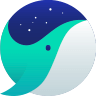
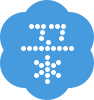

In [69]:
print(next_sibling.find_next_siblings()) #div태그의 id가 header의 아래의 모든 태그 가져오기

### 주의사항
- 아래의 코드와 같이 쓸 경우 코드의 행에 따라 결과가 달라짐 그러므로 아래와 같이 쓰지 말고 특정 태그를 변수로 받아와서 찾는것을 추천함

In [70]:
print(htmllang.find_previous_sibling("div",attrs={"id":"container"})) #div태그의 id가 container의 윗 태그 한개 가져오기

None


## 부모태그 가져오기

<div id="wrap"> <style type="text/css">._1syGnXOL{padding-right:18px;font-size:14px;line-height:0;letter-spacing:-.25px;color:#000}._1syGnXOL span,._1syGnXOL strong{line-height:49px}._1syGnXOL:before{display:inline-block;content:"";vertical-align:top;background-image:url(https://static-whale.pstatic.net/main/sprite-20210713@2x.png);background-repeat:no-repeat;background-size:116px 112px;width:18px;height:18px;margin:16px 8px 0 0;background-position:-98px 0}[data-useragent*="MSIE 8"] ._1syGnXOL:before{background-image:url(https://static-whale.pstatic.net/main/sprite-20210713.png)}._1syGnXOL._3dsvmZg2:before{background-position:-47px -85px}._1syGnXOL._1NBFx1WK:before{width:20px;height:20px;margin:15px 8px 0 0;background-position:-21px -89px}._1syGnXOL._2mcQEKCd:before{width:22px;height:22px;margin:14px 7px 0 0;background-position:-47px -63px}._1syGnXOL._36slsKuJ:before{width:21px;height:49px;margin:0 14px 0 0;background-position:0 -63px}._1syGnXOL._3di88A4c{padding-right:12px;font-size:1
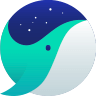
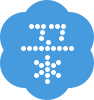

In [38]:
print(htmllang.find("div",attrs={"id":"container"}).parent) #div의 id가 container인 태그의 부모태그 가져오기